# SARK-110 Plot example

Simple Jupyter notebook example for interacting with the SARK-110 Antenna Analyzer.

Please ensure that the analyzer is connected to the computer using the USB cable and in Computer Control mode.

In [9]:
from sark110 import *
import math
import matplotlib.pyplot as plt

Enter frequency limits:

In [10]:
fr_start = 12000000   # Frequency start in Hz
fr_stop =  15000000   # Frequency stop in Hz
points = 40           # Number of points

## Utility functions

In [11]:
def z2vswr(r, x):
    gamma = math.sqrt((r - 50) ** 2 + x ** 2) / math.sqrt((r + 50) ** 2 + x ** 2)
    if gamma > 0.980197824:
        return 99.999
    swr = (1 + gamma) / (1 - gamma)
    return swr

def z2mag(r, x):
    return (math.sqrt(r ** 2 + x ** 2))

## Connect to the device

In [12]:
sark110 = Sark110()
sark110.open()
if sark110.connect() < 0:
    print("sark-110 not connected")
    exit(-1)
else:
    sark110.buzzer()
    print("sark-110 connected")
    print(sark110.fw_protocol, sark110.fw_version)

sark-110 connected
2566 1.5


## Acquire the data

In [13]:
y = []
y1 = []
x = []
rs = [0]
xs = [0]
print("start:", fr_start, "stop:", fr_stop, "points:", points)
for freq in range(fr_start, fr_stop, int((fr_stop-fr_start)/points)):  # setup loop over number of points
    sark110.measure(freq, rs, xs)
    x.append(freq)
    y.append(z2vswr(rs[0][0], xs[0][0]))    # VSWR
    y1.append(z2mag(rs[0][0], xs[0][0]))    # ZMAG

start: 12000000 stop: 15000000 points: 40


## Plot the data (single axis)

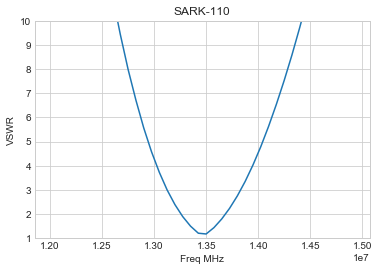

In [14]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, y)
plt.title('SARK-110')
plt.xlabel('Freq MHz')
plt.ylabel('VSWR')
plt.ylim(1., 10.)
plt.show()

## Plot the data (dual axis) 

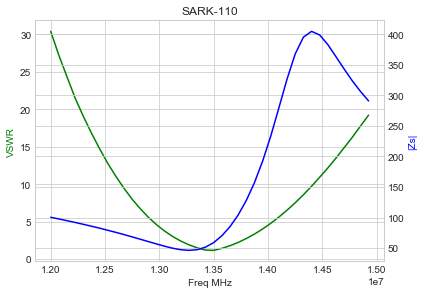

In [15]:
plt.style.use('seaborn-whitegrid')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x, y, 'g-')
ax2.plot(x, y1, 'b-')
ax1.set_xlabel('Freq MHz')
ax1.set_ylabel('VSWR', color='g')
ax2.set_ylabel('|Zs|', color='b')
fig.tight_layout() 
plt.title('SARK-110')

plt.show()

In [16]:
sark110.close()